# <a name="0">Итоговое задание</a>


Постройте модель машинного обучения для прогнозирования значения признака `Time at Center`.

1. <a href="#1">Считывание набора данных</a>
2. <a href="#2">Разработка модели машинного обучения</a>
    * <a href="#21">Исследовательский анализ данных</a>
    * <a href="#22">Выбор признаков для построения модели</a>
    * <a href="#23">Обработка данных</a>
    * <a href="#24">Обучение модели</a>
3. <a href="#3">Прогнозирование на тестовом наборе данных</a>

__Набор данных Austin Animal Center__:

Мы работаем с данными о домашних животных из приюта __Austin Animal Center__. У нас набор данных, который охватывает поступление и выбытие животных.

Набор данных состоит из следующих файлов:
- [training.csv](data/project/training.csv) - обучающая выборка
- [test_features.csv](data/project/test_features.csv) - тестовая выборка
- [y_test.csv](data/project/y_test.csv) - значения целевого признака для тестовой выборки

__Структура набора данных:__
- __Pet ID__ - Уникальный ID животного
- __Outcome Type__ - Состояние питомца на момент выбытия
- __Sex upon Outcome__ - Пол животного при выбытии
- __Name__ - Кличка животного
- __Found Location__ - Местонахождение животного до поступления в центр
- __Intake Type__ - Обстоятельства, при которых животное попало в центр
- __Intake Condition__ - Состояние здоровья животного на момент поступления в центр
- __Pet Type__ - Вид животного
- __Sex upon Intake__ - Пол животного при поступлении в центр
- __Breed__ - Порода животного
- __Color__ - Цвет животного
- __Age upon Intake Days__ - Возраст животного на момент поступления в центр (в днях)
- __Time at Center__ - Время в центре (0 = менее 30 дней; 1 = более 30 дней). _Это значение для прогнозирования_.


## 1. <a name="1">Считывание набора данных</a>
(<a href="#0">Перейти в начало</a>)

Считаем набор данных в структуру dataframe, используя Pandas.

In [51]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

training_data = pd.read_csv('/content/drive/MyDrive/DS/training.csv')
test_data = pd.read_csv('/content/drive/MyDrive/DS/test_features.csv')

print('Размер обучающей выборки:', training_data.shape)
print('Размер тестовой выборки:', test_data.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Размер обучающей выборки: (71538, 13)
Размер тестовой выборки: (23846, 12)


## 2. <a name="2">Разработка модели машинного обучения</a>
(<a href="#0">Перейти в начало</a>)

   * <a href="#21">Исследовательский анализ данных</a>
   * <a href="#22">Выбор признаков для построения модели</a>
   * <a href="#23">Обработка данных</a>
   * <a href="#24">Обучение модели</a>

### 2.1 <a name="21">Исследовательский анализ данных</a>
(<a href="#2">Перейти к разработке модели машинного обучения</a>)

Получим количество строк, столбцов и некоторую простую статистику набора данных.

In [13]:
# Выведем первые пять строк

training_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Time at Center
0,A745079,Transfer,Unknown,NaN,7920 Old Lockhart in Travis (TX),Stray,Normal,Cat,Unknown,Domestic Shorthair Mix,Blue,3,0
1,A801765,Transfer,Intact Female,NaN,5006 Table Top in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair,Brown Tabby/White,28,0
2,A667965,Transfer,Neutered Male,NaN,14100 Thermal Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Chihuahua Shorthair Mix,Brown/Tan,1825,0
3,A687551,Transfer,Intact Male,NaN,5811 Cedardale Dr in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,28,0
4,A773004,Adoption,Neutered Male,*Boris,Highway 290 And Arterial A in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Tricolor/Cream,365,0


In [14]:
# Выведем первые пять строк
test_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days
0,A782657,Adoption,Spayed Female,NaN,1911 Dear Run Drive in Austin (TX),Stray,Normal,Dog,Intact Female,Labrador Retriever Mix,Black,60
1,A804622,Adoption,Neutered Male,NaN,702 Grand Canyon in Austin (TX),Stray,Normal,Dog,Intact Male,Boxer/Anatol Shepherd,Brown/Tricolor,60
2,A786693,Return to Owner,Neutered Male,Zeus,Austin (TX),Public Assist,Normal,Dog,Neutered Male,Australian Cattle Dog/Pit Bull,Black/White,3285
3,A693330,Adoption,Spayed Female,Hope,Levander Loop & Airport Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,Miniature Poodle,Gray,1825
4,A812431,Adoption,Neutered Male,NaN,Austin (TX),Owner Surrender,Injured,Cat,Intact Male,Domestic Shorthair,Blue/White,210


In [15]:
# в скольки случаях  животное оставалось более 30 дней
training_data.loc[training_data['Time at Center'] == 1]

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Time at Center
66,A792954,Adoption,Neutered Male,*Ciabatta,9805 Halifax Dr in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,White/Brown Tabby,28,1
81,A664968,Return to Owner,Intact Male,Simba,W 55Th in Austin (TX),Stray,Normal,Dog,Intact Male,German Shepherd Mix,Tan/Black,330,1
90,A739092,Adoption,Neutered Male,*Buddy,900 Great Britain in Austin (TX),Stray,Injured,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,30,1
92,A732559,Adoption,Neutered Male,*Short Stuff,20906 Delorio St in Manor (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,14,1
94,A806617,Adoption,Intact Female,Mariko,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,Domestic Shorthair Mix,Black,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71482,A806171,Adoption,Spayed Female,*Lily,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,Domestic Shorthair,Blue/White,28,1
71485,A773681,Adoption,Spayed Female,*Ruth,Riverside Drive And Pleasant Vally in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,White/Black,28,1
71495,A796016,Adoption,Neutered Male,Kirby,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,Pembroke Welsh Corgi,Brown/White,240,1
71498,A778105,Adoption,Spayed Female,NaN,3522 East Martin Luther King Junior Boulevard ...,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Blue Tabby,21,1


In [16]:
# в скольки случаях  животное оставалось более 30 дней
test_data.loc[training_data['Time at Center'] == 1]

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days
66,A675585,Adoption,Spayed Female,Niki,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,Pit Bull Mix,Tan,28
81,A809337,Transfer,Intact Female,NaN,13224 Deesrbonne Drive in Travis (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair,Brown Tabby,1095
90,A765287,Return to Owner,Intact Female,Princess,Del Valle & Buck Lave in Austin (TX),Stray,Normal,Dog,Intact Female,Siberian Husky Mix,Silver/Black,1460
92,A721349,Adoption,Neutered Male,Oliver,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Black,1095
94,A657709,Euthanasia,Neutered Male,*Roy,6008 Sandshof in Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,Pit Bull Mix,Brown/White,730
...,...,...,...,...,...,...,...,...,...,...,...,...
23791,A751293,Adoption,Spayed Female,*Eudora,6905 Caudill Lane in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Medium Hair Mix,Blue,30
23802,A794148,Adoption,Neutered Male,*Monty,Rundberg And Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Male,Border Collie/Chow Chow,Black/White,330
23803,A803330,Adoption,Neutered Male,NaN,On Metro Bus in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair,Brown Tabby,90
23810,A671164,Transfer,Neutered Male,NaN,2805 Palomino in Austin (TX),Stray,Injured,Dog,Intact Male,Dalmatian Mix,White/Black,150


In [17]:
# Получим типы данных и количество ненулевых значений для каждого столбца
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71538 entries, 0 to 71537
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pet ID                71538 non-null  object
 1   Outcome Type          71533 non-null  object
 2   Sex upon Outcome      71537 non-null  object
 3   Name                  44360 non-null  object
 4   Found Location        71538 non-null  object
 5   Intake Type           71538 non-null  object
 6   Intake Condition      71538 non-null  object
 7   Pet Type              71538 non-null  object
 8   Sex upon Intake       71537 non-null  object
 9   Breed                 71538 non-null  object
 10  Color                 71538 non-null  object
 11  Age upon Intake Days  71538 non-null  int64 
 12  Time at Center        71538 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 7.1+ MB


In [18]:
# Получим типы данных и количество ненулевых значений для каждого столбца
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23846 entries, 0 to 23845
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pet ID                23846 non-null  object
 1   Outcome Type          23846 non-null  object
 2   Sex upon Outcome      23846 non-null  object
 3   Name                  14733 non-null  object
 4   Found Location        23846 non-null  object
 5   Intake Type           23846 non-null  object
 6   Intake Condition      23846 non-null  object
 7   Pet Type              23846 non-null  object
 8   Sex upon Intake       23846 non-null  object
 9   Breed                 23846 non-null  object
 10  Color                 23846 non-null  object
 11  Age upon Intake Days  23846 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 2.2+ MB


In [19]:
# Выведем базовую статистику для числовых столбцов
training_data.describe()

,Age upon Intake Days,Time at Center
count,71538.000000,71538.000000
mean,702.701487,0.087003
std,1051.158334,0.281841
min,0.000000,0.000000
25%,30.000000,0.000000
50%,365.000000,0.000000
75%,730.000000,0.000000
max,9125.000000,1.000000


In [20]:
# Выведем базовую статистику для числовых столбцов
test_data.describe()

,Age upon Intake Days
count,23846.000000
mean,708.514300
std,1056.841712
min,0.000000
25%,30.000000
50%,365.000000
75%,730.000000
max,8030.000000


In [21]:
print(training_data.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Time at Center'],
      dtype='object')


In [22]:
print(test_data.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days'],
      dtype='object')


In [23]:
# Разделим набор данных на признаки и цель
model_features = training_data.columns.drop('Time at Center')
model_target = 'Time at Center'

print('Признаки: ', model_features)
print('Цель: ', model_target)

Признаки:  Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days'],
      dtype='object')
Цель:  Time at Center


### 2.2 <a name="22">Выбор признаков для построения модели</a>
(<a href="#2">Перейти к разработке модели машинного обучения</a>)


In [24]:
#  Исследуем набор признаков

numerical_features = training_data[model_features].select_dtypes(include=np.number).columns
print('Числовые признаки:',numerical_features)

categorical_features = training_data[model_features].select_dtypes(include='object').columns
print('Категориальные признаки:',categorical_features)

text_features = training_data[model_features].select_dtypes(include='category').columns
print('Текстовые признаки:',text_features)


Числовые признаки: Index(['Age upon Intake Days'], dtype='object')
Категориальные признаки: Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color'],
      dtype='object')
Текстовые признаки: Index([], dtype='object')


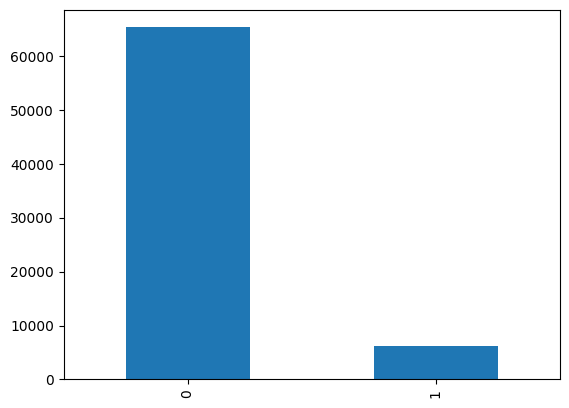

In [25]:
#Оценим распределение целевых показателей.

import matplotlib.pyplot as plt
%matplotlib inline

training_data[model_target].value_counts().plot.bar()
plt.show()

In [26]:
# Получим признаки модели/входы и цель/выход

# можно также взять меньше числовых характеристик, так как некоторые числовые данные могут быть не очень полезны
numerical_features = ['Age upon Intake Days']

# отбросить признаки ID, RescuerID и PetID
categorical_features = ['Sex upon Outcome', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake']

# из EDA, выберем текстовые признаки
text_features = ['Name', 'Found Location', 'Breed', 'Color']

model_features = numerical_features + categorical_features + text_features
model_target = 'Time at Center'

In [38]:
# Вывод всех названий столбцов
print(training_data.columns.tolist())
print(test_data.columns.tolist())

['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color', 'Age upon Intake Days', 'Time at Center']
['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color', 'Age upon Intake Days']


Age upon Intake Days


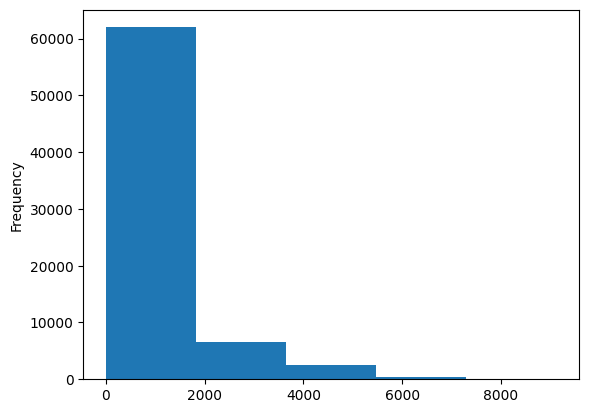

In [40]:
# Рассмотрим только числовые признаки, чтобы построить модель
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features:
    print(c)
    training_data[c].plot.hist(bins=5)
    plt.show()

In [41]:
for c in numerical_features:
    print(c)
    print('min:', training_data[c].min(), 'max:', training_data[c].max())

Age upon Intake Days
min: 0 max: 9125


In [30]:
for c in numerical_features:
    print(c)
    print(training_data[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     56111
(912.5, 1825.0]      7948
(1825.0, 2737.5]     2596
(2737.5, 3650.0]     2973
(3650.0, 4562.5]      954
(4562.5, 5475.0]      757
(5475.0, 6387.5]      135
(6387.5, 7300.0]       59
(7300.0, 8212.5]        3
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64


In [42]:
#Проверим отсутствующие значения для этих числовых характеристик
print(training_data[numerical_features].isna().sum())

Age upon Intake Days    0
dtype: int64


In [43]:
print( training_data[model_target].isna().sum())

0


### 2.3 <a name="23">Обработка данных</a>
(<a href="#2">Перейти к разработке модели машинного обучения</a>)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


### PIPELINE ###
################

# Конвейер необходимых преобразований данных, вместе с обучением в конце
# Для каждого шага укажите: имя, преобразователь данных и модель обучения с параметрами
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

# Отобразим конвейер
# Это полезно, особенно при построении более сложных конвейеров, объединяющих несколько этапов предварительной обработки.
from sklearn import set_config
set_config(display='diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

### 2.4 <a name="24">Обучение модели</a>
(<a href="#2">Перейти к разработке модели машинного обучения</a>)


In [46]:
# Реализация здесь
# Получение обучающих данных для обучения классификатора
X_train = training_data[numerical_features]
y_train = training_data[model_target]



# Обучение классификатора на обучающей выборке
# Для данных, проходящих через конвейер, сначала заполняются отсутствующие значения, затем признаки масштабируются и, наконец, используются для обучения
classifier.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

In [47]:
#Проверка классификатора

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Используем обученную модель для прогнозирования на обучающем наборе данных
# Обучающие данные, проходящие через конвейер, сначала заполняются недостающими значениями (со средними из столбца), масштабируются (с минимальными/максимальными значениями из данных столбца) и, наконец, используются для прогнозирования.
training_predictions = classifier.predict(X_train)

print('Характеристики модели на обучающей выборке:')
print(confusion_matrix(y_train, training_predictions))
print(classification_report(y_train, training_predictions))
print("Метрика accuracy:", accuracy_score(y_train, training_predictions))

Характеристики модели на обучающей выборке:
[[64052  1262]
 [ 5902   322]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     65314
           1       0.20      0.05      0.08      6224

    accuracy                           0.90     71538
   macro avg       0.56      0.52      0.51     71538
weighted avg       0.85      0.90      0.87     71538

Метрика accuracy: 0.8998574184349576


## 3. <a name="3">Прогнозирование на тестовом наборе данных</a>
(<a href="#0">Перейти в начало</a>)

Используйте тестовую выборку для прогнозирования с помощью обученной модели.

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Получение тестовых данных для проверки классификатора
X_test = test_data[numerical_features]
y_test = pd.read_csv('/content/drive/MyDrive/DS/y_test.csv', header=None)



# Используем обученную модель для прогнозирования на тестовом наборе данных
# Тестовые данные, проходящие через конвейер, сначала заполняются недостающими значениями (со средними из столбца), масштабируются (с минимальными/максимальными значениями из данных столбца) и, наконец, используются для прогнозирования.
test_predictions = classifier.predict(X_test)

print('Характеристики модели на тестовой выборке:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Метрика accuracy:", accuracy_score(y_test, test_predictions))

Характеристики модели на тестовой выборке:
[[21332   401]
 [ 2009   104]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     21733
           1       0.21      0.05      0.08      2113

    accuracy                           0.90     23846
   macro avg       0.56      0.52      0.51     23846
weighted avg       0.85      0.90      0.87     23846

Метрика accuracy: 0.8989348318376248
